In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r'D:\MS-Excel\LR_DA\flipkart_top_mobiles.csv')

In [3]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

# Data Cleaning

In [4]:
df['title']

0               POCO C50 (Royal Blue, 32 GB)  (2 GB RAM)
1        MOTOROLA G32 (Mineral Gray, 128 GB)  (8 GB RAM)
2               POCO C51 (Royal Blue, 64 GB)  (4 GB RAM)
3              POCO C51 (Power Black, 64 GB)  (4 GB RAM)
4             POCO C55 (Forest Green, 64 GB)  (4 GB RAM)
5      Infinix Smart 7 HD (Green Apple, 64 GB)  (2 GB...
6              POCO C55 (Power Black, 64 GB)  (4 GB RAM)
7       Infinix SMART 7 (Night Black, 64 GB)  (4 GB RAM)
8        Infinix SMART 7 (Azure Blue, 64 GB)  (4 GB RAM)
9      Infinix HOT 30i (Mirror Black, 128 GB)  (8 GB ...
10     Infinix HOT 30i (Diamond White, 128 GB)  (8 GB...
11     Infinix HOT 30i (Glacier Blue, 128 GB)  (8 GB ...
12     Infinix HOT 30i (Mirror Black, 64 GB)  (4 GB RAM)
13     Infinix HOT 30i (Diamond White, 64 GB)  (4 GB ...
14     Infinix HOT 30i (Glacier Blue, 64 GB)  (4 GB RAM)
15        MOTOROLA e13 (Cosmic Black, 64 GB)  (4 GB RAM)
16     Infinix SMART 7 (Emerald Green, 64 GB)  (4 GB ...
17           POCO C50 (Country 

In [5]:
df.head()

,title,price,prod_rating,rating_count,discount,seller_rating
0,"POCO C50 (Royal Blue, 32 GB) (2 GB RAM)","₹5,649",4.2,"35,666",37%,4.9
1,"MOTOROLA G32 (Mineral Gray, 128 GB) (8 GB RAM)","₹11,999",4.1,"22,293",36%,4.9
2,"POCO C51 (Royal Blue, 64 GB) (4 GB RAM)","₹6,999",4.3,"17,647",30%,5.0
3,"POCO C51 (Power Black, 64 GB) (4 GB RAM)","₹6,999",4.3,"17,647",30%,4.9
4,"POCO C55 (Forest Green, 64 GB) (4 GB RAM)","₹7,749",4.2,"26,218",35%,4.9


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          216 non-null    object 
 1   price          216 non-null    object 
 2   prod_rating    216 non-null    float64
 3   rating_count   216 non-null    object 
 4   discount       208 non-null    object 
 5   seller_rating  215 non-null    float64
dtypes: float64(2), object(4)
memory usage: 10.2+ KB


## Splitting the title column into 4 more columns

In [7]:
df['title']

0               POCO C50 (Royal Blue, 32 GB)  (2 GB RAM)
1        MOTOROLA G32 (Mineral Gray, 128 GB)  (8 GB RAM)
2               POCO C51 (Royal Blue, 64 GB)  (4 GB RAM)
3              POCO C51 (Power Black, 64 GB)  (4 GB RAM)
4             POCO C55 (Forest Green, 64 GB)  (4 GB RAM)
5      Infinix Smart 7 HD (Green Apple, 64 GB)  (2 GB...
6              POCO C55 (Power Black, 64 GB)  (4 GB RAM)
7       Infinix SMART 7 (Night Black, 64 GB)  (4 GB RAM)
8        Infinix SMART 7 (Azure Blue, 64 GB)  (4 GB RAM)
9      Infinix HOT 30i (Mirror Black, 128 GB)  (8 GB ...
10     Infinix HOT 30i (Diamond White, 128 GB)  (8 GB...
11     Infinix HOT 30i (Glacier Blue, 128 GB)  (8 GB ...
12     Infinix HOT 30i (Mirror Black, 64 GB)  (4 GB RAM)
13     Infinix HOT 30i (Diamond White, 64 GB)  (4 GB ...
14     Infinix HOT 30i (Glacier Blue, 64 GB)  (4 GB RAM)
15        MOTOROLA e13 (Cosmic Black, 64 GB)  (4 GB RAM)
16     Infinix SMART 7 (Emerald Green, 64 GB)  (4 GB ...
17           POCO C50 (Country 

In [8]:
string='POCO C50 (Royal Blue, 32 GB)  (2 GB RAM)'

In [9]:
li1=string.split('(')
li1

['POCO C50 ', 'Royal Blue, 32 GB)  ', '2 GB RAM)']

In [10]:
li1[2]

'2 GB RAM)'

In [11]:
elem1=string.split('(')[0]
elem1

'POCO C50 '

In [12]:
elem2=string.split('(')[1].split(',')[0]
elem2

'Royal Blue'

In [13]:
elem3=string.split('(')[1].split(',')[1].split(')')[0]
elem3

' 32 GB'

In [14]:
elem4=string.split('(')[2].split(')')[0].split(' RAM')[0]
elem4

'2 GB'

## all-in-one function:

In [15]:
def proliferate(string):
    li=string.split('(')
    model=string.split('(')[0]
    color=string.split('(')[1].split(',')[0]
    memory=string.split('(')[1].split(',')[1].split(')')[0]
    RAM=string.split('(')[2].split(')')[0].split(' RAM')[0]
    ddf=pd.Series([model,color,memory,RAM])
    return ddf

In [16]:
string='POCO C50 (Royal Blue, 32 GB)  (2 GB RAM)'

In [17]:
proliferate(string)

0     POCO C50 
1    Royal Blue
2         32 GB
3          2 GB
dtype: object

In [18]:
df.head()

,title,price,prod_rating,rating_count,discount,seller_rating
0,"POCO C50 (Royal Blue, 32 GB) (2 GB RAM)","₹5,649",4.2,"35,666",37%,4.9
1,"MOTOROLA G32 (Mineral Gray, 128 GB) (8 GB RAM)","₹11,999",4.1,"22,293",36%,4.9
2,"POCO C51 (Royal Blue, 64 GB) (4 GB RAM)","₹6,999",4.3,"17,647",30%,5.0
3,"POCO C51 (Power Black, 64 GB) (4 GB RAM)","₹6,999",4.3,"17,647",30%,4.9
4,"POCO C55 (Forest Green, 64 GB) (4 GB RAM)","₹7,749",4.2,"26,218",35%,4.9


In [19]:
#df[['model','color','memory','RAM']]=df['title'].apply(proliferate)

In [20]:
df.head(100)

,title,price,prod_rating,rating_count,discount,seller_rating
0,"POCO C50 (Royal Blue, 32 GB) (2 GB RAM)","₹5,649",4.2,"35,666",37%,4.9
1,"MOTOROLA G32 (Mineral Gray, 128 GB) (8 GB RAM)","₹11,999",4.1,"22,293",36%,4.9
2,"POCO C51 (Royal Blue, 64 GB) (4 GB RAM)","₹6,999",4.3,"17,647",30%,5.0
3,"POCO C51 (Power Black, 64 GB) (4 GB RAM)","₹6,999",4.3,"17,647",30%,4.9
4,"POCO C55 (Forest Green, 64 GB) (4 GB RAM)","₹7,749",4.2,"26,218",35%,4.9
5,"Infinix Smart 7 HD (Green Apple, 64 GB) (2 GB...","₹6,199",4.4,"8,109",22%,4.8
6,"POCO C55 (Power Black, 64 GB) (4 GB RAM)","₹7,749",4.2,"26,218",35%,4.9
7,"Infinix SMART 7 (Night Black, 64 GB) (4 GB RAM)","₹7,299",4.3,"38,126",27%,4.9
8,"Infinix SMART 7 (Azure Blue, 64 GB) (4 GB RAM)","₹7,299",4.3,"38,126",27%,4.9
9,"Infinix HOT 30i (Mirror Black, 128 GB) (8 GB ...","₹8,999",4.3,"29,196",25%,4.9


In [21]:
def distribute(string):
    try:
        li = string.split('(')
        model = li[0].strip()
        color = li[1].split(',')[0].strip()
        memory = li[1].split(',')[1].strip()
        RAM = li[2].split(')')[0].replace('RAM', '').strip()
       
        ddf = pd.Series([model, color, memory, RAM])
        return ddf
    except:
        return pd.Series([np.nan, np.nan, np.nan, np.nan])

In [22]:
df[['model','color','memory','RAM']]=df['title'].apply(distribute)

In [74]:
df.head(10)

,title,price,prod_rating,rating_count,discount(%),seller_rating,model,color,memory,RAM
0,"POCO C50 (Royal Blue, 32 GB) (2 GB RAM)","₹5,649",4.2,"35,666",37.0,4.9,POCO C50,"Royal Blue, 32 GB",2 GB,2 GB
1,"MOTOROLA G32 (Mineral Gray, 128 GB) (8 GB RAM)","₹11,999",4.1,"22,293",36.0,4.9,MOTOROLA G32,"Mineral Gray, 128 GB",8 GB,8 GB
2,"POCO C51 (Royal Blue, 64 GB) (4 GB RAM)","₹6,999",4.3,"17,647",30.0,5.0,POCO C51,"Royal Blue, 64 GB",4 GB,4 GB
3,"POCO C51 (Power Black, 64 GB) (4 GB RAM)","₹6,999",4.3,"17,647",30.0,4.9,POCO C51,"Power Black, 64 GB",4 GB,4 GB
4,"POCO C55 (Forest Green, 64 GB) (4 GB RAM)","₹7,749",4.2,"26,218",35.0,4.9,POCO C55,"Forest Green, 64 GB",4 GB,4 GB
5,"Infinix Smart 7 HD (Green Apple, 64 GB) (2 GB...","₹6,199",4.4,"8,109",22.0,4.8,Infinix Smart 7 HD,"Green Apple, 64 GB",2 GB,2 GB
6,"POCO C55 (Power Black, 64 GB) (4 GB RAM)","₹7,749",4.2,"26,218",35.0,4.9,POCO C55,"Power Black, 64 GB",4 GB,4 GB
7,"Infinix SMART 7 (Night Black, 64 GB) (4 GB RAM)","₹7,299",4.3,"38,126",27.0,4.9,Infinix SMART 7,"Night Black, 64 GB",4 GB,4 GB
8,"Infinix SMART 7 (Azure Blue, 64 GB) (4 GB RAM)","₹7,299",4.3,"38,126",27.0,4.9,Infinix SMART 7,"Azure Blue, 64 GB",4 GB,4 GB
9,"Infinix HOT 30i (Mirror Black, 128 GB) (8 GB ...","₹8,999",4.3,"29,196",25.0,4.9,Infinix HOT 30i,"Mirror Black, 128 GB",8 GB,8 GB


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          216 non-null    object 
 1   price          216 non-null    object 
 2   prod_rating    216 non-null    float64
 3   rating_count   216 non-null    object 
 4   discount       208 non-null    object 
 5   seller_rating  215 non-null    float64
 6   model          177 non-null    object 
 7   color          177 non-null    object 
 8   memory         177 non-null    object 
 9   RAM            177 non-null    object 
dtypes: float64(2), object(8)
memory usage: 17.0+ KB


In [25]:
df=df.drop(['model','color','memory','RAM'],axis=1)

In [26]:
df.head(5)

,title,price,prod_rating,rating_count,discount,seller_rating
0,"POCO C50 (Royal Blue, 32 GB) (2 GB RAM)","₹5,649",4.2,"35,666",37%,4.9
1,"MOTOROLA G32 (Mineral Gray, 128 GB) (8 GB RAM)","₹11,999",4.1,"22,293",36%,4.9
2,"POCO C51 (Royal Blue, 64 GB) (4 GB RAM)","₹6,999",4.3,"17,647",30%,5.0
3,"POCO C51 (Power Black, 64 GB) (4 GB RAM)","₹6,999",4.3,"17,647",30%,4.9
4,"POCO C55 (Forest Green, 64 GB) (4 GB RAM)","₹7,749",4.2,"26,218",35%,4.9


In [27]:
st='POCO X5 5G (Jaguar Black, 128 GB)  (6 GB RAM)'

In [28]:
import re 
re.match(r'^(.*?) \(', st)

<re.Match object; span=(0, 12), match='POCO X5 5G ('>

In [29]:
re.match(r'^(.*?) \(', st).group(1)

'POCO X5 5G'

In [ ]:
def func(string):
    try:
        li = string.split('(')
        model = li[0].strip()
        color = li[1].split(',')[0].strip()
        memory = li[1].split(',')[1].strip() 
        RAM = li[2].split(')')[0].replace('RAM', '').strip()
       
        ddf = pd.Series([model, color, memory, RAM])
        return ddf
    except:
        return pd.Series([np.nan, np.nan, np.nan, np.nan])

In [30]:
def Distribute(string):
    try:
        model = string.split('(')[0].strip()
        color_match = re.search(r'\((.*?)\)', string)
        color = color_match.group(1).strip() if color_match else np.nan
        memory_match = re.search(r'(\d+ [\w ]+) RAM', string)  
        memory = memory_match.group(1).strip() if memory_match else np.nan
        RAM_match = re.search(r'(\d+ [\w ]+) RAM\)', string)
        RAM = RAM_match.group(1).strip() if RAM_match else np.nan
        

        ddf = pd.Series([model, color, memory, RAM])
        return ddf
    except:
        return pd.Series([np.nan, np.nan, np.nan, np.nan])

In [31]:
df[['model','color','memory','RAM']]=df['title'].apply(Distribute)

In [32]:
df

,title,price,prod_rating,rating_count,discount,seller_rating,model,color,memory,RAM
0,"POCO C50 (Royal Blue, 32 GB) (2 GB RAM)","₹5,649",4.2,"35,666",37%,4.9,POCO C50,"Royal Blue, 32 GB",2 GB,2 GB
1,"MOTOROLA G32 (Mineral Gray, 128 GB) (8 GB RAM)","₹11,999",4.1,"22,293",36%,4.9,MOTOROLA G32,"Mineral Gray, 128 GB",8 GB,8 GB
2,"POCO C51 (Royal Blue, 64 GB) (4 GB RAM)","₹6,999",4.3,"17,647",30%,5.0,POCO C51,"Royal Blue, 64 GB",4 GB,4 GB
3,"POCO C51 (Power Black, 64 GB) (4 GB RAM)","₹6,999",4.3,"17,647",30%,4.9,POCO C51,"Power Black, 64 GB",4 GB,4 GB
4,"POCO C55 (Forest Green, 64 GB) (4 GB RAM)","₹7,749",4.2,"26,218",35%,4.9,POCO C55,"Forest Green, 64 GB",4 GB,4 GB
5,"Infinix Smart 7 HD (Green Apple, 64 GB) (2 GB...","₹6,199",4.4,"8,109",22%,4.8,Infinix Smart 7 HD,"Green Apple, 64 GB",2 GB,2 GB
6,"POCO C55 (Power Black, 64 GB) (4 GB RAM)","₹7,749",4.2,"26,218",35%,4.9,POCO C55,"Power Black, 64 GB",4 GB,4 GB
7,"Infinix SMART 7 (Night Black, 64 GB) (4 GB RAM)","₹7,299",4.3,"38,126",27%,4.9,Infinix SMART 7,"Night Black, 64 GB",4 GB,4 GB
8,"Infinix SMART 7 (Azure Blue, 64 GB) (4 GB RAM)","₹7,299",4.3,"38,126",27%,4.9,Infinix SMART 7,"Azure Blue, 64 GB",4 GB,4 GB
9,"Infinix HOT 30i (Mirror Black, 128 GB) (8 GB ...","₹8,999",4.3,"29,196",25%,4.9,Infinix HOT 30i,"Mirror Black, 128 GB",8 GB,8 GB


In [33]:
df.columns

Index(['title', 'price', 'prod_rating', 'rating_count', 'discount',
       'seller_rating', 'model', 'color', 'memory', 'RAM'],
      dtype='object')

In [34]:
df.head(3)

,title,price,prod_rating,rating_count,discount,seller_rating,model,color,memory,RAM
0,"POCO C50 (Royal Blue, 32 GB) (2 GB RAM)","₹5,649",4.2,"35,666",37%,4.9,POCO C50,"Royal Blue, 32 GB",2 GB,2 GB
1,"MOTOROLA G32 (Mineral Gray, 128 GB) (8 GB RAM)","₹11,999",4.1,"22,293",36%,4.9,MOTOROLA G32,"Mineral Gray, 128 GB",8 GB,8 GB
2,"POCO C51 (Royal Blue, 64 GB) (4 GB RAM)","₹6,999",4.3,"17,647",30%,5.0,POCO C51,"Royal Blue, 64 GB",4 GB,4 GB


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          216 non-null    object 
 1   price          216 non-null    object 
 2   prod_rating    216 non-null    float64
 3   rating_count   216 non-null    object 
 4   discount       208 non-null    object 
 5   seller_rating  215 non-null    float64
 6   model          216 non-null    object 
 7   color          216 non-null    object 
 8   memory         177 non-null    object 
 9   RAM            177 non-null    object 
dtypes: float64(2), object(8)
memory usage: 17.0+ KB


In [36]:
df.shape

(216, 10)

In [37]:
null=df.isnull().sum()
null

title             0
price             0
prod_rating       0
rating_count      0
discount          8
seller_rating     1
model             0
color             0
memory           39
RAM              39
dtype: int64

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

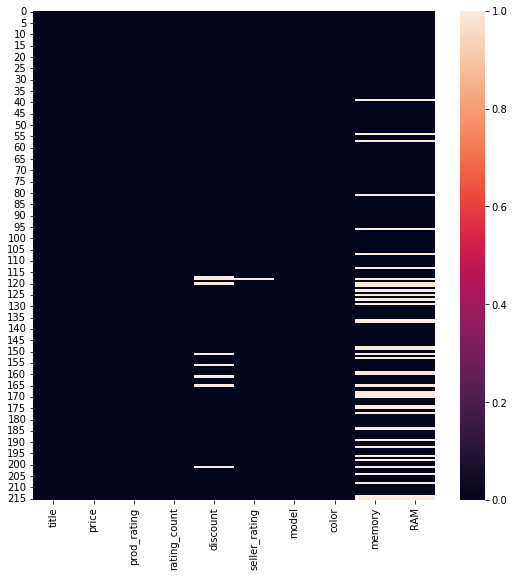

In [39]:
plt.figure(figsize=(9,9))
sns.heatmap(df.isnull())

plt.show()

In [40]:
null_perc=(null/df.shape[0])*100
null_perc

title             0.000000
price             0.000000
prod_rating       0.000000
rating_count      0.000000
discount          3.703704
seller_rating     0.462963
model             0.000000
color             0.000000
memory           18.055556
RAM              18.055556
dtype: float64

### Imputing nan values in columns using mode

In [41]:
df['memory'].mode()

0    4 GB
Name: memory, dtype: object

In [42]:
df['memory'].mode()[0]

'4 GB'

In [43]:
df['memory'].isnull().sum()

39

In [44]:
df['memory'].value_counts()

4 GB     65
6 GB     51
8 GB     37
2 GB     14
3 GB      8
16 GB     2
Name: memory, dtype: int64

In [45]:
# memory & RAM columns cannot be converted into float datatype since they contain the string 'GB'.
#Imputing these using their mode values

In [46]:
#df['memory']=df['memory'].fillna(df['memory'].mode()

In [47]:
df['memory'].isnull().sum()

39

In [48]:
df['memory'].value_counts()

4 GB     65
6 GB     51
8 GB     37
2 GB     14
3 GB      8
16 GB     2
Name: memory, dtype: int64

In [49]:
df['memory'].fillna(df['memory'].mode()[0],inplace=True)

In [50]:
df['memory'].isnull().sum()

0

In [51]:
df['RAM'].isnull().sum()

39

In [52]:
df['RAM'].fillna(df['RAM'].mode()[0],inplace=True)

In [53]:
df['RAM'].isnull().sum()

0

## Converting discount series to float datatype to ease imputating its nan values by its mean

In [54]:
df['discount'].dtype

dtype('O')

In [55]:
#ERROR
#df['discount']=df['discount'].astype('float64')

In [56]:
#long method
#check=df['discount'].str.split('%')
#check

In [57]:
#for i in check:
 #   print(i[0])

In [58]:
#proper method
df['discount'].str.strip('%')

0       37
1       36
2       30
3       30
4       35
5       22
6       35
7       27
8       27
9       25
10      25
11      25
12      20
13      20
14      20
15      33
16      27
17      37
18      29
19      35
20      36
21       9
22      36
23      35
24       9
25      36
26      35
27      10
28      33
29      40
30      23
31      26
32      26
33      27
34      27
35      25
36      23
37      23
38      26
39      16
40      27
41      40
42      29
43      29
44      35
45      12
46      12
47      14
48      15
49      29
50      43
51      35
52      43
53      36
54      16
55      23
56      35
57       9
58      37
59      21
60      25
61      37
62      25
63      25
64      19
65      19
66      20
67      20
68      30
69      29
70      33
71      23
72      19
73      20
74      20
75      33
76      23
77      29
78      42
79      30
80      25
81      16
82      34
83      34
84      36
85      31
86      21
87      26
88      37
89      43
90      26

In [59]:
df['discount']=df['discount'].str.strip('%').astype('float')

In [60]:
df['discount']

0      37.0
1      36.0
2      30.0
3      30.0
4      35.0
5      22.0
6      35.0
7      27.0
8      27.0
9      25.0
10     25.0
11     25.0
12     20.0
13     20.0
14     20.0
15     33.0
16     27.0
17     37.0
18     29.0
19     35.0
20     36.0
21      9.0
22     36.0
23     35.0
24      9.0
25     36.0
26     35.0
27     10.0
28     33.0
29     40.0
30     23.0
31     26.0
32     26.0
33     27.0
34     27.0
35     25.0
36     23.0
37     23.0
38     26.0
39     16.0
40     27.0
41     40.0
42     29.0
43     29.0
44     35.0
45     12.0
46     12.0
47     14.0
48     15.0
49     29.0
50     43.0
51     35.0
52     43.0
53     36.0
54     16.0
55     23.0
56     35.0
57      9.0
58     37.0
59     21.0
60     25.0
61     37.0
62     25.0
63     25.0
64     19.0
65     19.0
66     20.0
67     20.0
68     30.0
69     29.0
70     33.0
71     23.0
72     19.0
73     20.0
74     20.0
75     33.0
76     23.0
77     29.0
78     42.0
79     30.0
80     25.0
81     16.0
82     34.0
83  

In [61]:
df.rename(columns={'discount':'discount(%)'},inplace=True)

In [62]:
df.columns

Index(['title', 'price', 'prod_rating', 'rating_count', 'discount(%)',
       'seller_rating', 'model', 'color', 'memory', 'RAM'],
      dtype='object')

In [63]:
df['discount(%)'].head(10)

0    37.0
1    36.0
2    30.0
3    30.0
4    35.0
5    22.0
6    35.0
7    27.0
8    27.0
9    25.0
Name: discount(%), dtype: float64

## Imputation using median

In [64]:
df.describe()

,prod_rating,discount(%),seller_rating
count,216.000000,208.000000,215.000000
mean,4.250926,25.163462,4.832093
std,0.149726,9.924946,0.270415
min,4.000000,2.000000,3.500000
25%,4.100000,19.750000,4.900000
50%,4.200000,26.000000,4.900000
75%,4.325000,33.000000,5.000000
max,4.700000,56.000000,5.000000


In [65]:
# Mean & median are almost same so presence of outliers seems to be the least.

In [66]:
df['discount(%)'].median()

26.0

In [67]:
df['discount(%)']=df['discount(%)'].fillna(df['discount(%)'].median())

In [68]:
df['discount(%)'].isnull().sum()

0

In [69]:
df['seller_rating']=df['seller_rating'].fillna(df['seller_rating'].median())

In [70]:
df['seller_rating'].isnull().sum()

0

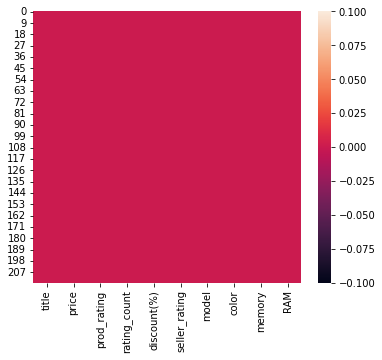

In [71]:
plt.figure(figsize=(6,5))
sns.heatmap(df.isnull())

plt.show()

# Data Cleaning Done!

In [72]:
#SAVING THIS DF as a new file_name
#DataFrame.to_csv(filename, sep=',', index=False, encoding='utf-8')
df.to_csv('cleaned_df', sep=',')